predicting the capacity of the machines 

CDATE : time range for each customer order

CUSTPO : Order NO.

SAM : completion of one garment in minutes 

Machines : number of stitching machines 

capacity : 1 day = 2 shifts = (8 hours + 8 hours)*60  = 960 mins * machines = capacity - (there are 2 shifts of 8 hours in 1 day with total of 960 mins and we multiply it with the machines to get the capacity, so the capacity of the machines is defined by the time (minutes) it can work in day)

capacity wasted : capacity - stitchmin (substracting utilized time from the capacity time gives us the capacity wasted)

capacity waste % : (capacity wasted / capcity)*100

Stitchmin : utilized minutes from the total capacity minutes

production per capacity : Number of garments stitched per capacity (capacity / SAM)

production per stitchmin : Number of garments stitched per stitchmin (utilized capacity) (stitchmin / SAM)

production per machine : SAM * machines - how many garments can be stitched within SAM minutes with given machines

SHIP_DATE : commitment date 

SUM(FIN_RCVD) 	SUM(SHIP_RCVD) 	SUM(DISPATCH) 	

In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

import pandas_profiling
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [119]:
df = pd.read_csv('/home/bigpenguin/Downloads/NewData.csv')
df.drop('UNITNO',axis=1,inplace=True)
df
# importing the data

CDATE                 CUSTPO  SAM  machines  capacity   SHIP_DATE  \
0       1/1/2020       TT-210715SP20-12  5.0        12     11520    1/4/2020   
1       1/1/2020     TT-21071FSDSP20-12  5.0        11     10560    1/4/2020   
2       1/1/2020    TT-2107SDSDFSP20-12  4.0        12     11520  10/31/2020   
3       1/1/2020       TT-36516VMI-B-12  4.0        10      9600   10/5/2019   
4       1/1/2020  TT-AMZ-AESHORT72-C-12  5.0        10      9600  11/15/2019   
...          ...                    ...  ...       ...       ...         ...   
53859  3/31/2020     ww-WM-V-20Y020G-78  4.5        10      9600   2/22/2020   
53860  3/31/2020     ww-WM-V-20Y020H-78  4.5        10      9600    3/7/2020   
53861  3/31/2020     ww-WM-V-20Y020H-78  4.5        10      9600    3/7/2020   
53862  3/31/2020    ww-WM-V-20Y020-H-78  4.5        10      9600   9/23/2019   
53863  3/31/2020  ww-WM-V20Y020HASF1-78  4.5        10      9600   3/25/2020   

       SUM(FIN_RCVD)  SUM(SHIP_RCVD)  SUM(DISPATCH)  Stitchmin  
0                NaN             NaN            NaN        0.0  
1                NaN             NaN            NaN        0.0  
2                NaN             NaN            NaN        0.0  
3                NaN             NaN            NaN        0.0  
4                NaN             NaN            NaN        0.0  
...              ...             ...            ...        ...  
53859            NaN             NaN            NaN        0.0  
53860            NaN             NaN            NaN        0.0  
53861            NaN             NaN            NaN        0.0  
53862            NaN             NaN            NaN        0.0  
53863            NaN             NaN            NaN        0.0  

[53864 rows x 10 columns]

In [120]:
df.isna().sum()
# checking for the missing values in columns 
# SUM(FIN_RCVD)     31545
# SUM(SHIP_RCVD)    34350
# SUM(DISPATCH)     40048
# only these columns have missing values

CDATE                 0
CUSTPO                0
SAM                   0
machines              0
capacity              0
SHIP_DATE             0
SUM(FIN_RCVD)     41997
SUM(SHIP_RCVD)    42858
SUM(DISPATCH)     51984
Stitchmin             0
dtype: int64

In [121]:
df['production per capacity']=df['capacity']/df['SAM']
df['production per capacity']=df['production per capacity'].astype(int)
df['production per stitchmin']=df['Stitchmin']/df['SAM']
df['production per stitchmin']=df['production per stitchmin'].astype(int)
df['capacity wasted']=df['capacity']-df['Stitchmin']
df['capacity waste %']=(df['capacity wasted']/df['capacity'])*100
df['capacity waste %']=df['capacity waste %'].astype(int)
df['production per machine']=df['SAM']*df['machines']
df=df[['CDATE','SAM','machines','capacity','Stitchmin','capacity waste %','capacity wasted','production per machine'
       ,'production per capacity','production per stitchmin','CUSTPO','SHIP_DATE','SUM(FIN_RCVD)','SUM(SHIP_RCVD)',
       'SUM(DISPATCH)']]
df
# capacity wasted : capacity - stitchmin (substracting utilized time from the capacity time gives us the capacity wasted)

# capacity waste % : (capacity wasted / capcity)*100

# production per capacity : Number of garments stitched per capacity (capacity / SAM)

# production per stitchmin : Number of garments stitched per stitchmin (utilized capacity) (stitchmin / SAM)

# production per machine : SAM * machines - how many garments can be stitched within SAM minutes with given machines

CDATE  SAM  machines  capacity  Stitchmin  capacity waste %  \
0       1/1/2020  5.0        12     11520        0.0               100   
1       1/1/2020  5.0        11     10560        0.0               100   
2       1/1/2020  4.0        12     11520        0.0               100   
3       1/1/2020  4.0        10      9600        0.0               100   
4       1/1/2020  5.0        10      9600        0.0               100   
...          ...  ...       ...       ...        ...               ...   
53859  3/31/2020  4.5        10      9600        0.0               100   
53860  3/31/2020  4.5        10      9600        0.0               100   
53861  3/31/2020  4.5        10      9600        0.0               100   
53862  3/31/2020  4.5        10      9600        0.0               100   
53863  3/31/2020  4.5        10      9600        0.0               100   

       capacity wasted  production per machine  production per capacity  \
0              11520.0                    60.0                     2304   
1              10560.0                    55.0                     2112   
2              11520.0                    48.0                     2880   
3               9600.0                    40.0                     2400   
4               9600.0                    50.0                     1920   
...                ...                     ...                      ...   
53859           9600.0                    45.0                     2133   
53860           9600.0                    45.0                     2133   
53861           9600.0                    45.0                     2133   
53862           9600.0                    45.0                     2133   
53863           9600.0                    45.0                     2133   

       production per stitchmin                 CUSTPO   SHIP_DATE  \
0                             0       TT-210715SP20-12    1/4/2020   
1                             0     TT-21071FSDSP20-12    1/4/2020   
2                             0    TT-2107SDSDFSP20-12  10/31/2020   
3                             0       TT-36516VMI-B-12   10/5/2019   
4                             0  TT-AMZ-AESHORT72-C-12  11/15/2019   
...                         ...                    ...         ...   
53859                         0     ww-WM-V-20Y020G-78   2/22/2020   
53860                         0     ww-WM-V-20Y020H-78    3/7/2020   
53861                         0     ww-WM-V-20Y020H-78    3/7/2020   
53862                         0    ww-WM-V-20Y020-H-78   9/23/2019   
53863                         0  ww-WM-V20Y020HASF1-78   3/25/2020   

       SUM(FIN_RCVD)  SUM(SHIP_RCVD)  SUM(DISPATCH)  
0                NaN             NaN            NaN  
1                NaN             NaN            NaN  
2                NaN             NaN            NaN  
3                NaN             NaN            NaN  
4                NaN             NaN            NaN  
...              ...             ...            ...  
53859            NaN             NaN            NaN  
53860            NaN             NaN            NaN  
53861            NaN             NaN            NaN  
53862            NaN             NaN            NaN  
53863            NaN             NaN            NaN  

[53864 rows x 15 columns]

In [122]:
c=df.groupby('CDATE')['capacity','Stitchmin','capacity wasted'].sum()
px.line(c)
# line plot of capacity , stitchmin and capacity wasted 

In [123]:
pcps=df.groupby('CDATE')[['production per capacity','production per stitchmin']].sum()
px.line(pcps)
# production per capacity and production per stitchmin grouped with their own CDATE

In [124]:
cap=df.groupby('CDATE')[['capacity','production per capacity']].sum()
px.line(cap)
# capacity and production per capacity grouped with their own CDATE

In [125]:
stitch=df.groupby('CDATE')[['Stitchmin','production per stitchmin']].sum()
px.line(stitch)
# stitchmin and production per stitchmin grouped with their own CDATE

In [126]:
mach_cap=df.groupby('machines')['production per capacity'].agg(['mean'])
px.bar(mach_cap,width=700,height=500,labels={'value':'production per capacity'})
# mean of production per capacity for every machine 

In [127]:
mach_sti=df.groupby('machines')['production per stitchmin'].agg(['mean'])
px.bar(mach_sti,width=700,height=500,labels={'value':'production per stitch'})
# mean of production per stitchmin for every machine 

In [128]:
mach2=df.groupby('machines')['capacity waste %'].mean()
px.bar(mach2,width=700,height=500,labels={'value':'capacity waste %'})
# mean of capacity waste % for every machine 

In [129]:
recv=df.groupby('CDATE')[['production per stitchmin','SUM(FIN_RCVD)']].sum()
px.bar(recv,barmode='group')
# sum of production per stitchmin and sum(fin_rcvd) for their related cdate
# production per stitchmin that we caculated is exactly what sum(FIN_RCVD) is which confirms the authenticity of 
# our calculations 

In [130]:
recv=df.groupby('CDATE')[['production per stitchmin','SUM(SHIP_RCVD)']].sum()
px.bar(recv,barmode='group')
# sum of production per stitchmin and sum(ship_rcvd) for their related cdate

In [131]:
recv=df.groupby('CDATE')[['production per stitchmin','SUM(DISPATCH)']].sum()
px.bar(recv,barmode='group')
# sum of production per stitchmin and sum(dispatch) for their related cdate

In [132]:
px.bar(df.groupby('machines')[['SUM(FIN_RCVD)','SUM(SHIP_RCVD)','SUM(DISPATCH)']].sum(),barmode='group')
# sum of 'SUM(FIN_RCVD)','SUM(SHIP_RCVD)','SUM(DISPATCH)' for machines

In [133]:
px.bar(df.groupby('capacity')[['SUM(FIN_RCVD)','SUM(SHIP_RCVD)','SUM(DISPATCH)']].sum(),barmode='group')
# sum of 'SUM(FIN_RCVD)','SUM(SHIP_RCVD)','SUM(DISPATCH)' for capacity

In [134]:
# px.box(df[['SAM','Machines','capacity','Stitchmin','capacity waste %','capacity wasted','production per machine'
#        ,'production per capacity','production per stitchmin']])

In [135]:
index=df[df['Stitchmin']>df['capacity']].index
df=df.drop(index)
df.shape

(52182, 15)

<AxesSubplot:>

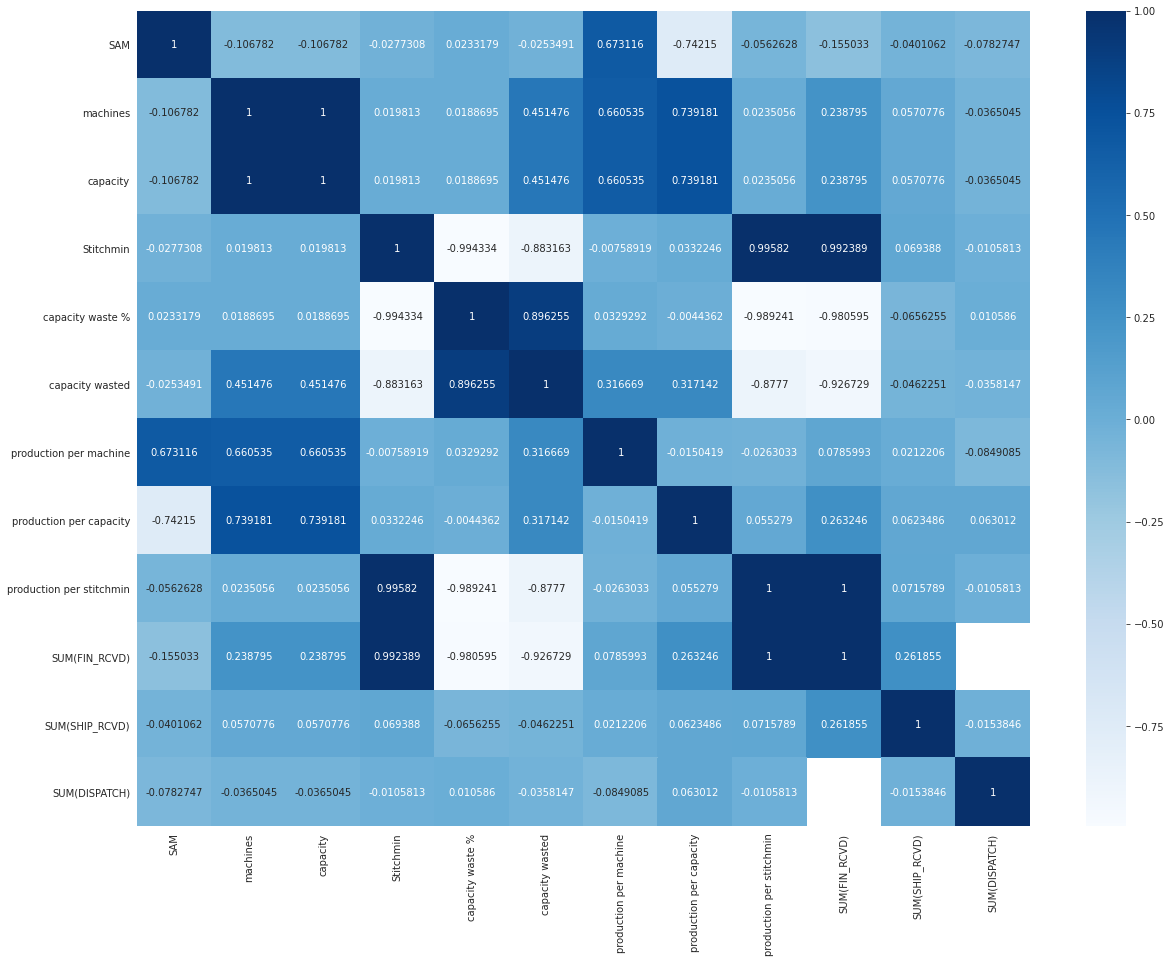

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(df.corr(),annot=True,cmap='Blues', fmt='g')
# columns correlated with production per capacity , production per machine and capacity wasted , machine is 
# completely correlated with capacity so we might ignore it for train and test datasets.

In [137]:
# df=

In [138]:
# selecting the features we need for our model.
X2=df[['production per machine' ,'production per capacity','machines']]
y2=df[['capacity']]
# collect three performance metrics by substituting and adding the features in the X and y 
# 1 'production per machine' ,'production per capacity'
# 2 'production per machine' ,'production per capacity','Machines'
# 3 'production per machine' ,'production per capacity','capacity wasted'
# selecting the best performing features.

<AxesSubplot:>

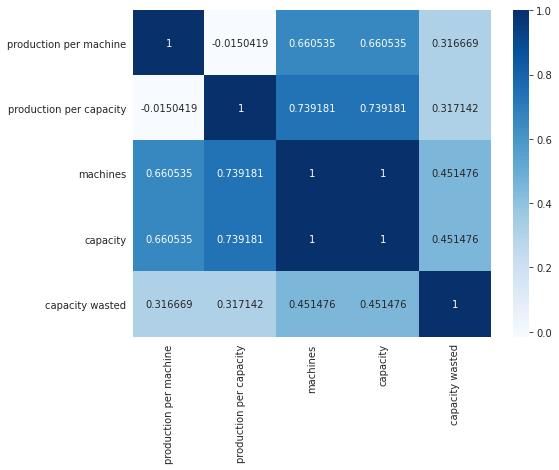

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(df[['production per machine' ,'production per capacity','machines','capacity','capacity wasted']].corr(),annot=True,cmap='Blues', fmt='g')

In [140]:
px.scatter_matrix(df[['production per machine' ,'production per capacity','machines','capacity','capacity wasted']])
# we have confirmed our correlation with scatter matrix plot, compare the capacity with the other attributes.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3,random_state=42)
# split the dataset into train and test datasets

In [142]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
# train the model on train dataset

LogisticRegression()

In [143]:
lr_pred = logreg.predict(X_test)
accuracy_score(lr_pred, y_test) * 100
# predict and calculate the accuracy of the model
# we have 90 % accuracy which is a very good accuracy

91.9897796231236

In [144]:
cv_scores = cross_val_score(logreg,X2,y2,cv=5)
np.mean(cv_scores)*100
# calculate the cross validation score

80.28688328477867

In [145]:
print(confusion_matrix(y_test,lr_pred))
# calculating the confusion matrix of the predicted values and original values

[[5270    0    0    0]
 [   0 3521    0    0]
 [   0    0 5610    0]
 [   0    0 1254    0]]


In [146]:
print(classification_report(y_test,lr_pred))
# complete classification report

              precision    recall  f1-score   support

        9600       1.00      1.00      1.00      5270
       10560       1.00      1.00      1.00      3521
       11520       0.82      1.00      0.90      5610
       12480       0.00      0.00      0.00      1254

    accuracy                           0.92     15655
   macro avg       0.70      0.75      0.72     15655
weighted avg       0.85      0.92      0.88     15655



In [147]:
y_test['Predicted']=lr_pred
y_test
# capacity (original values) and predicted values. 

capacity  Predicted
38612     11520      11520
38478     11520      11520
23768      9600       9600
51052     11520      11520
22657     11520      11520
...         ...        ...
1447       9600       9600
30441     10560      10560
26064      9600       9600
6799      11520      11520
52717      9600       9600

[15655 rows x 2 columns]